## Import Libraries

In [3]:
# importing libraries
import numpy as np
import cv2
import os 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Loaded data
image_names=[]
output=[]
labels=[]
benign = 0
malignant = 0
#define classes
classes={'Benign':0,"Malignant":1}  
for name in classes:
    address='C:/Users/ANKUR/Downloads/Project_Report/BUS_Images/'+name
    for add in os.listdir(address):
            image = cv2.imread(address+'/'+add)
            image = cv2.resize(image, (128,128))
            image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype =cv2.CV_8U)
            image_names.append(image)
            output.append(classes[name])
            if classes[name] == 0:
                benign = benign+1
            if classes[name] == 1:
                malignant = malignant + 1
            labels.append(name)               

In [6]:
# number of images
print("Benign Images :",benign)
print("Malignant Images :",malignant)
print("length of data =",len(image_names), "files=", len(output), "labels=",len(labels))

Benign Images : 437
Malignant Images : 210
length of data = 647 files= 647 labels= 647


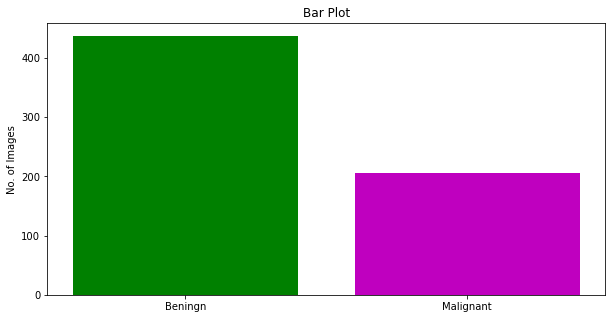

In [7]:
# plot the bar graph for number of benign and malignant images
fig = plt.figure(figsize = (10, 5))
k1=0
k2=0
for i in range (0,643):
    if output[i]==0:
        k1+=1
    else:
        k2+=1
plt.bar([0,1],[k1,k2], color = ['g','m'])
plt.xticks([0,1], ['Beningn', 'Malignant'])
plt.ylabel("No. of Images")
plt.title("Bar Plot") 
plt.show()

In [8]:
## function to plot sample images
def sample_images(images,gray = False):
    figure, axes = plt.subplots(1, 4)
    figure.set_size_inches(35,25)
    axes[0].imshow(images[1],cmap='gray') if gray else axes[0].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
    axes[0].title.set_text("Benign")
    axes[0].axis('off')
    axes[1].imshow(images[55],cmap='gray') if gray else axes[1].imshow(cv2.cvtColor(images[55], cv2.COLOR_BGR2RGB))
    axes[1].title.set_text("Benign")
    axes[1].axis('off')
    axes[2].imshow(images[450],cmap='gray') if gray else axes[2].imshow(cv2.cvtColor(images[450], cv2.COLOR_BGR2RGB))
    axes[2].axis('off')
    axes[2].title.set_text("Malignant")
    axes[3].imshow(images[451],cmap='gray') if gray else axes[3].imshow(cv2.cvtColor(images[451], cv2.COLOR_BGR2RGB))
    axes[3].axis('off')
    axes[3].title.set_text("Malignant")
    plt.show()

In [9]:
# function to find the histogram of images
def hist(I):       #2D
    if len(I.shape)>2:
        I=cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
    H=np.zeros((256,1))
    for x in np.nditer(I):
        if x>255:
            x=255
        elif x<0:
            x=0
        H[int(x)]=H[int(x)]+1
    return H

In [10]:
## look for image shape and type of input images
input_images = image_names
print(np.array(input_images).shape)
print(input_images[10].dtype)

(647, 128, 128, 3)
uint8


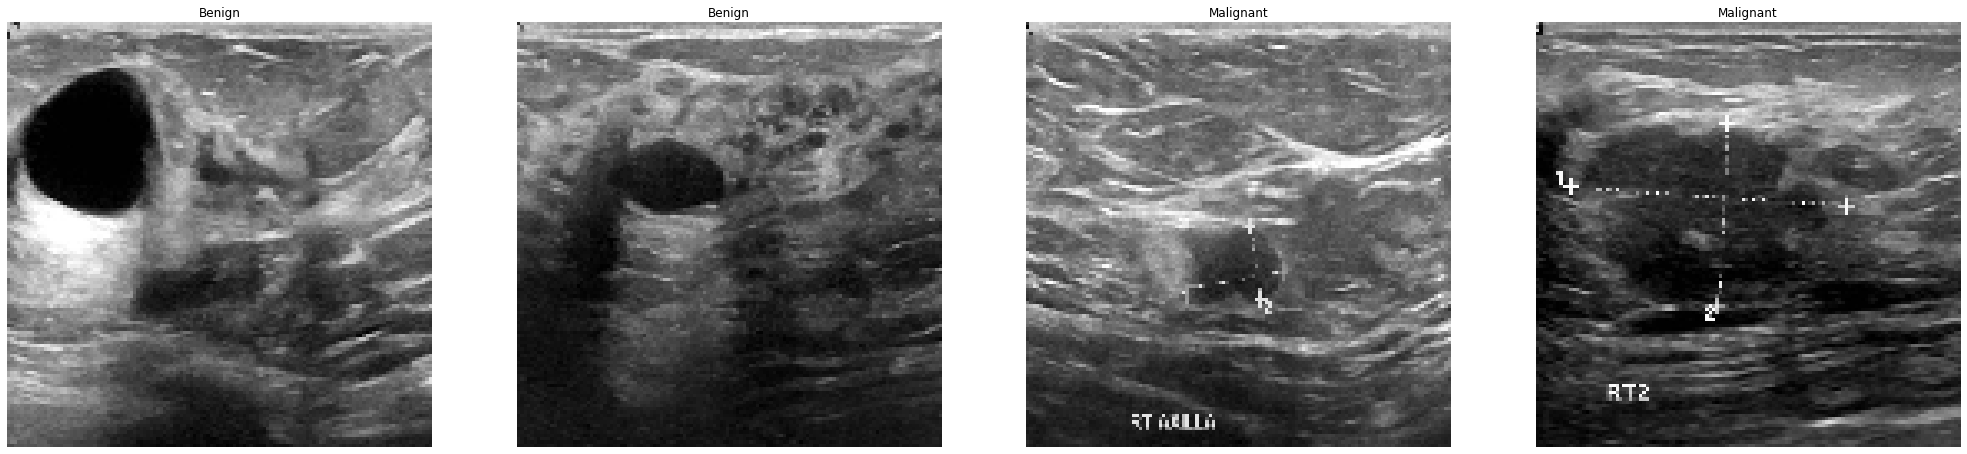

In [11]:
## plot the sample images
sample_images(input_images)

## Image Preprocessing

### Grayscale Image

647


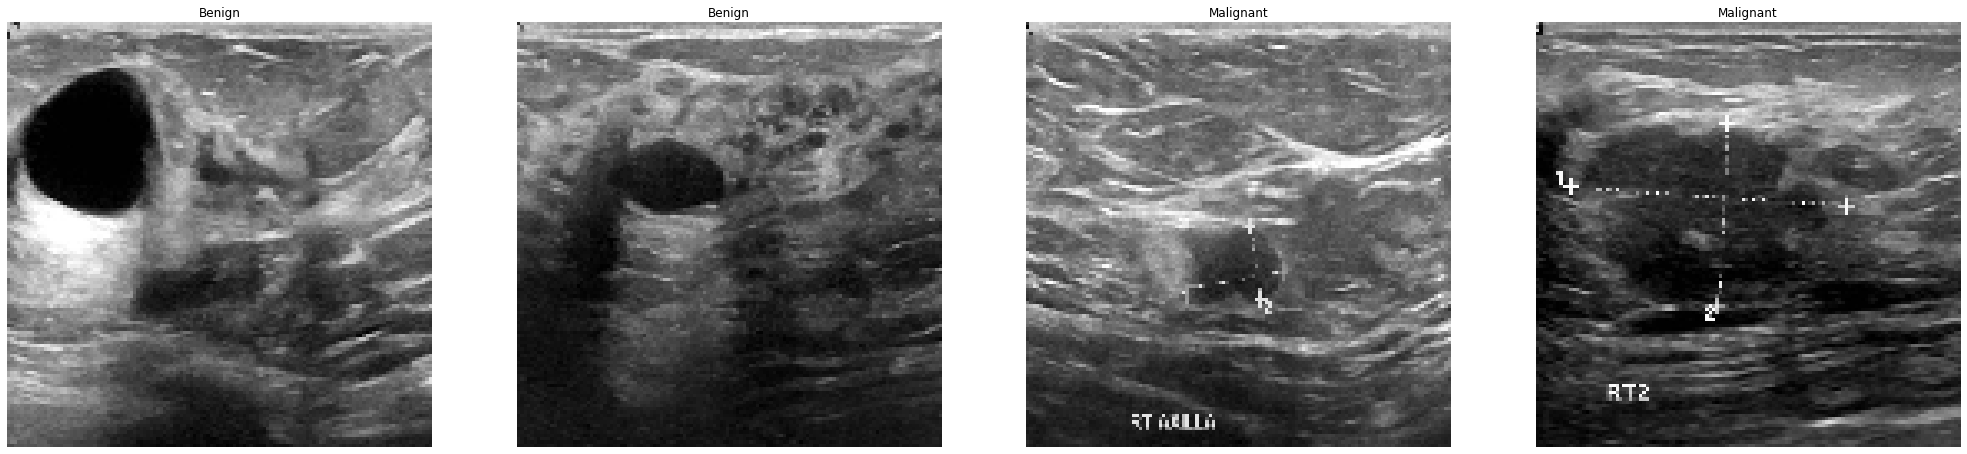

In [12]:
# convert the RBG images to gray scale images
grayscale_images = []
grayscale_images.clear()
for idx, image in enumerate(input_images,1):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale_images.append(gray_image)
print(idx)    
sample_images(grayscale_images)

Text(0.5, 1.0, 'histogram for malignant')

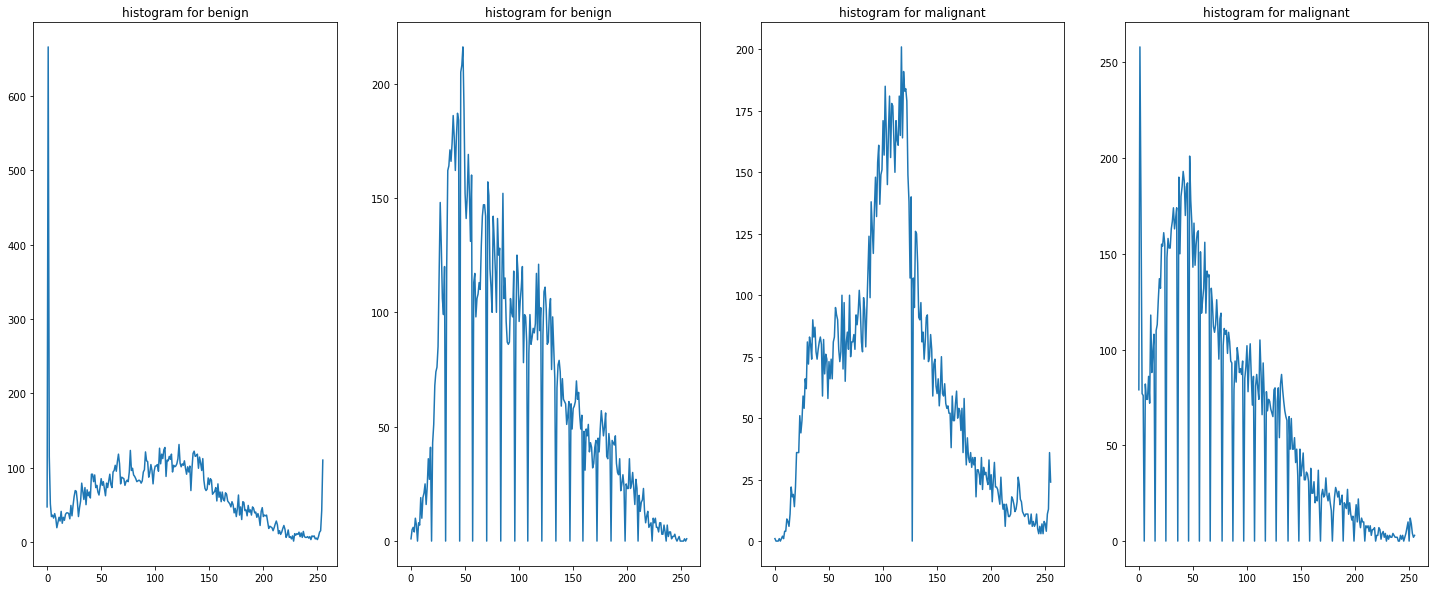

In [13]:
## plot for histogram equalization
fig = plt.figure(figsize=[25,10])
plt.subplot(1,4,1)
plt.plot(hist(grayscale_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(grayscale_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(grayscale_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(grayscale_images[451]))
plt.title('histogram for malignant')

### Histogram Equalization

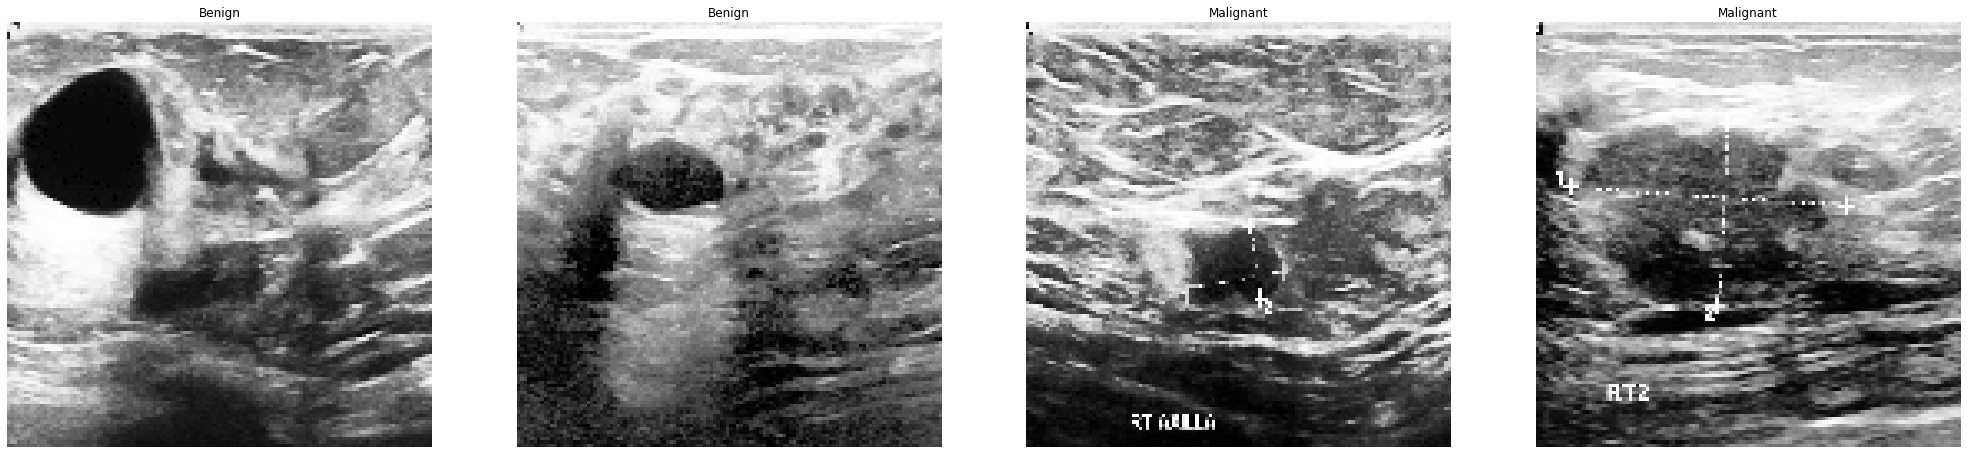

In [14]:
# histogram equalization on gray scale images
eqhist_images=[]
eqhist_images.clear()
for idx, image in enumerate(grayscale_images):
    eqhistimage = cv2.equalizeHist(image)
    eqhist_images.append(eqhistimage)
sample_images(eqhist_images, True)

Text(0.5, 1.0, 'histogram for malignant')

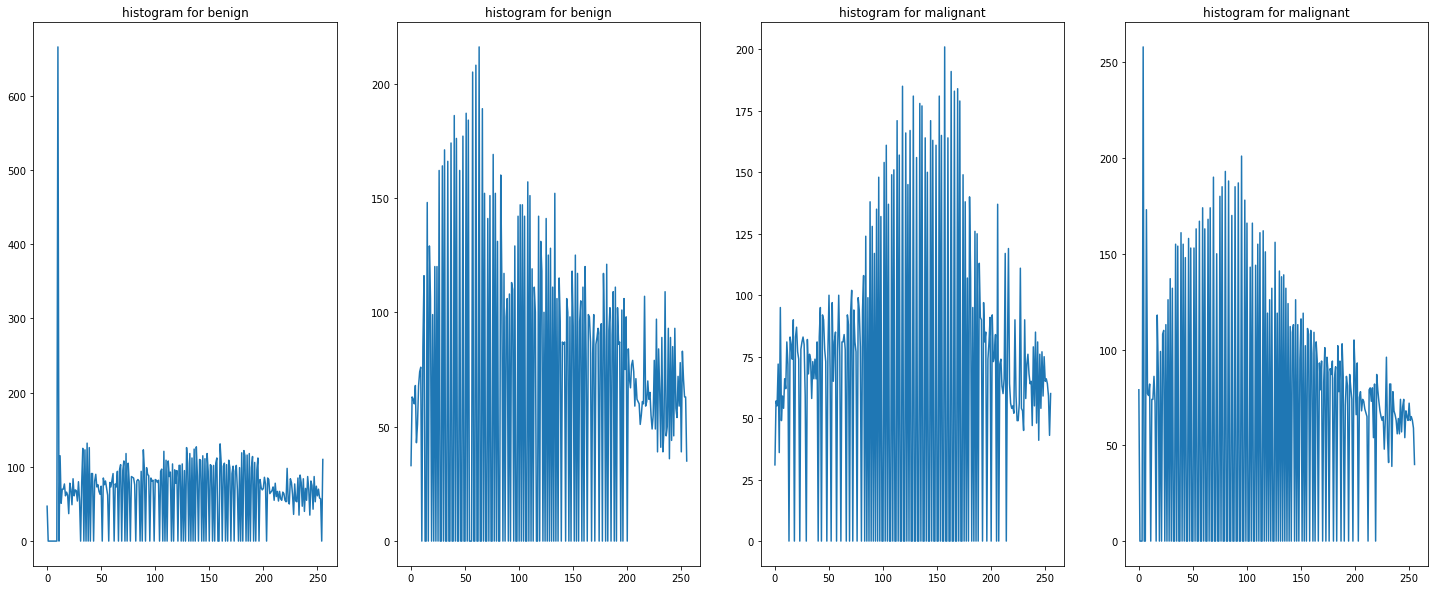

In [15]:
# plot the histogram after histogram operation
fig = plt.figure(figsize=[25,10])
plt.subplot(1,4,1)
plt.plot(hist(eqhist_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(eqhist_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(eqhist_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(eqhist_images[451]))
plt.title('histogram for malignant')

### Bilateral Filter

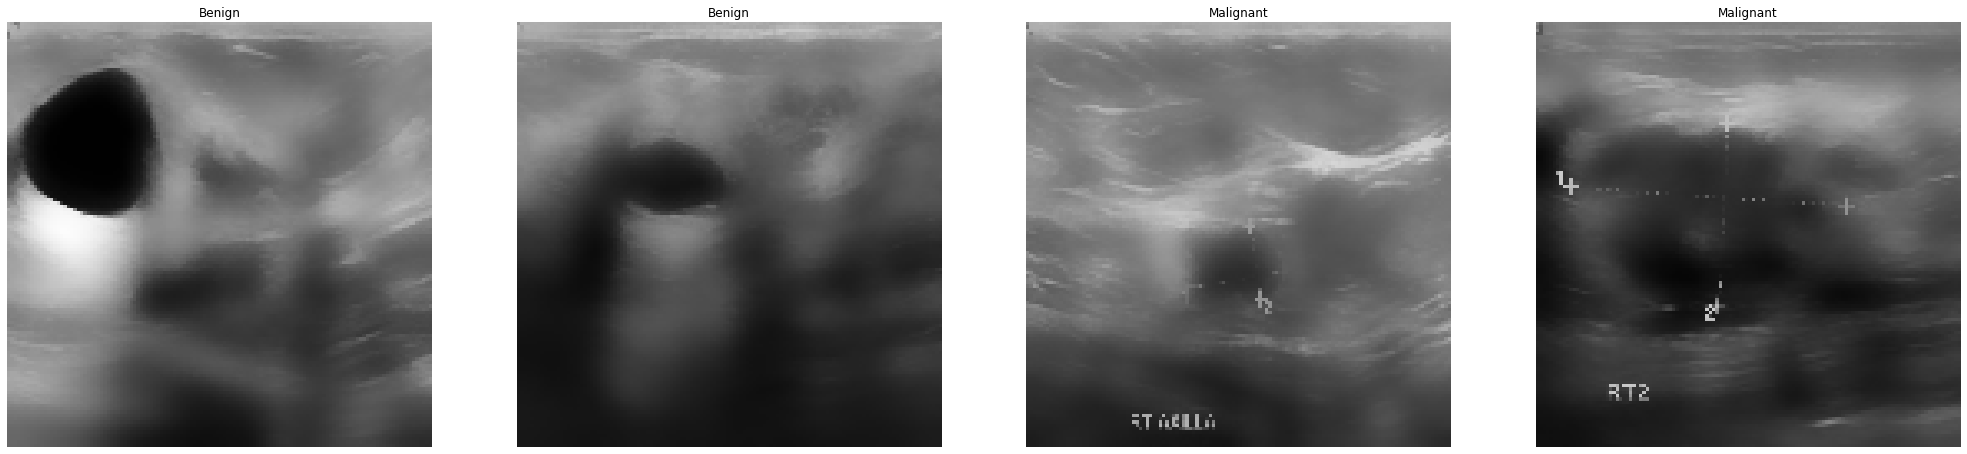

In [16]:
## Applying bilateral filter on grayscale images
bilateral_images = []
bilateral_images.clear()
for idx, image in enumerate(grayscale_images):
    bilateral = cv2.bilateralFilter(image, 15, 75, 75)
    bilateral_images.append(bilateral)
sample_images(bilateral_images)

Text(0.5, 1.0, 'histogram for malignant')

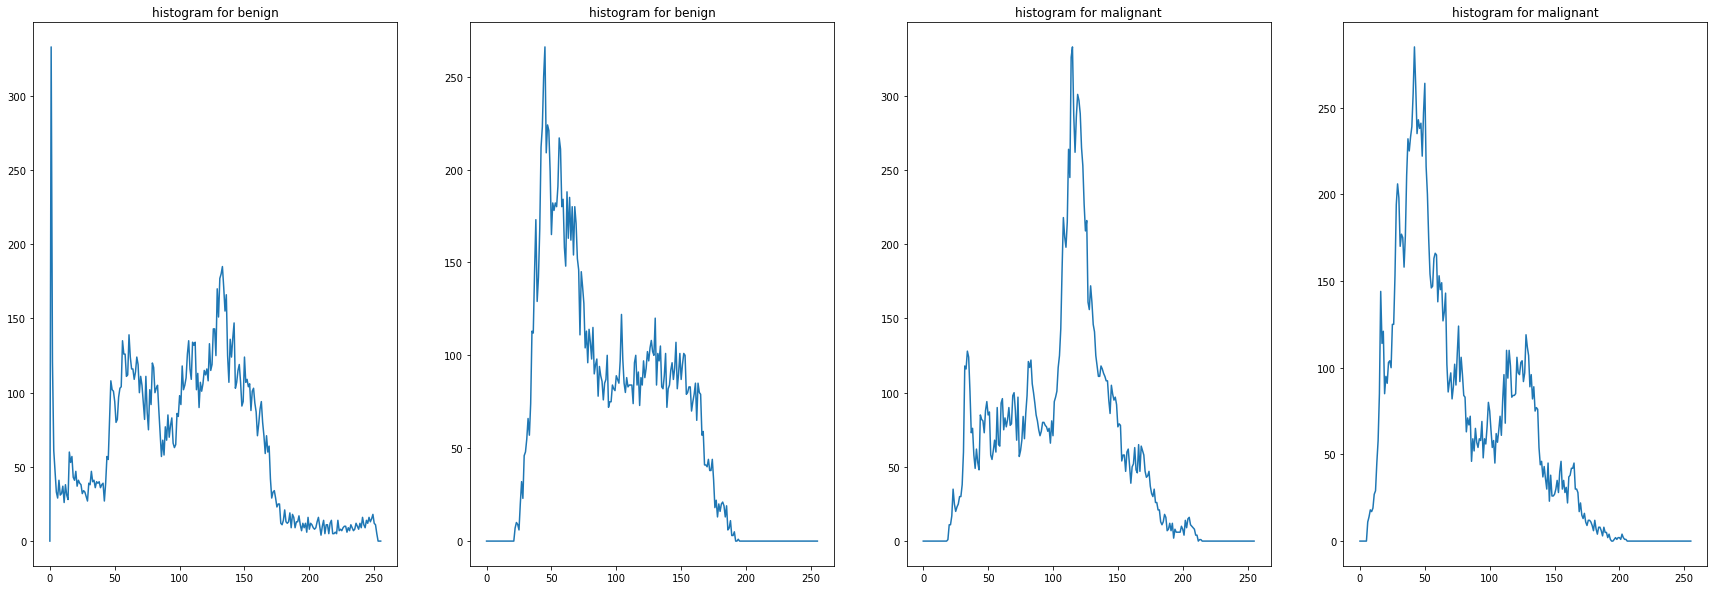

In [17]:
## plot the histogram of bilateral filter
fig = plt.figure(figsize=[30,10])
plt.subplot(1,4,1)
plt.plot(hist(bilateral_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(bilateral_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(bilateral_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(bilateral_images[451]))
plt.title('histogram for malignant')

### CLAHE

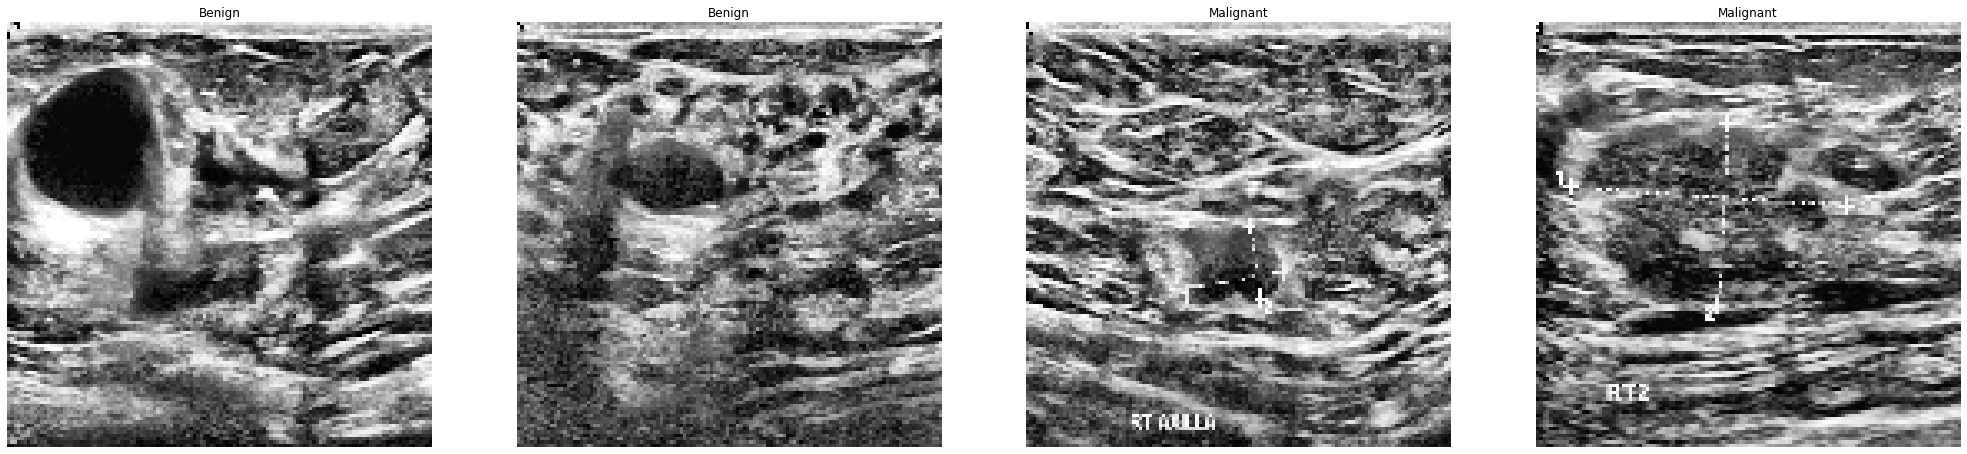

In [18]:
# applying clahe on grayscale images
Clahe_images=[]
Clahe_images.clear()
for idx, image in enumerate(grayscale_images):
    #R, G, B = cv2.split(image)
    
    clahe = cv2.createCLAHE(clipLimit = 5)
    clahe_img = clahe.apply(image) 
    Clahe_images.append(clahe_img)
sample_images(Clahe_images, True)

Text(0.5, 1.0, 'histogram for malignant')

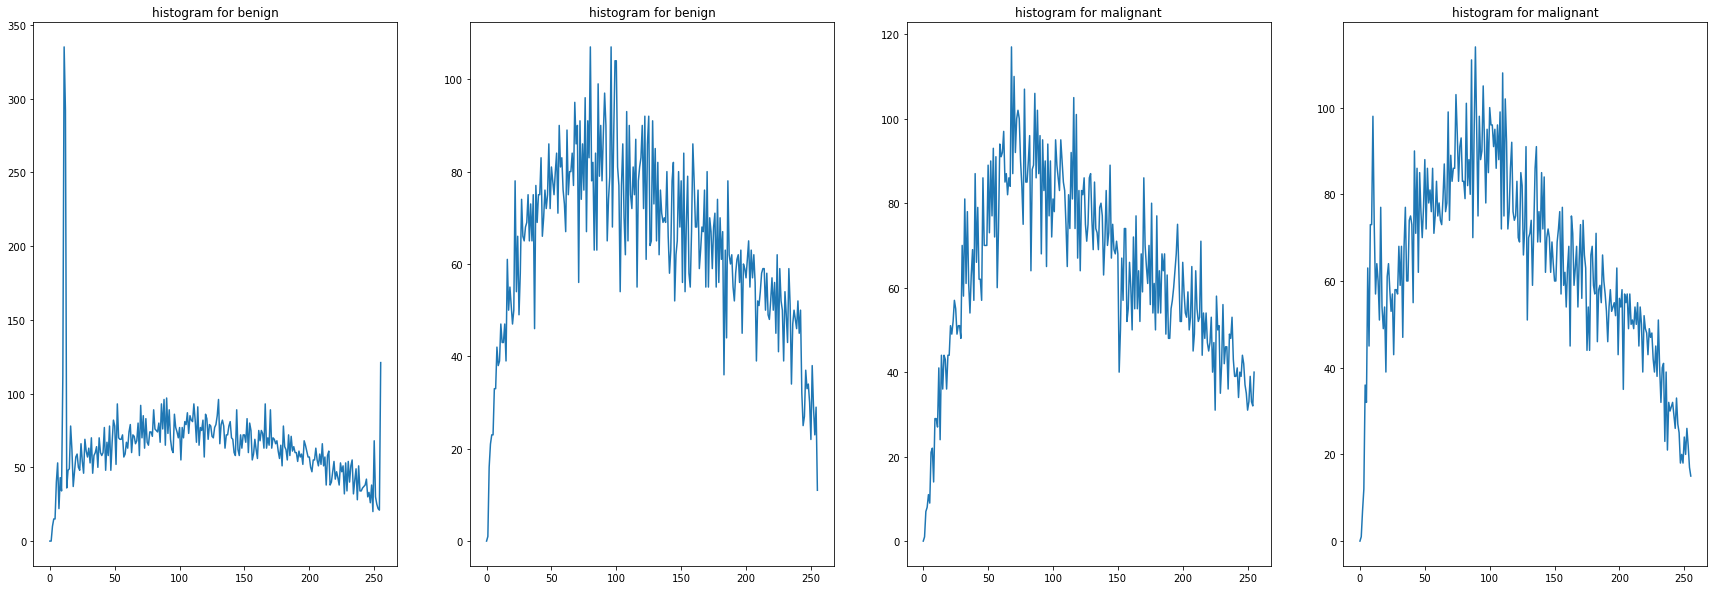

In [19]:
# plot the histogram after clahe operation
fig = plt.figure(figsize=[30,10])
plt.subplot(1,4,1)
plt.plot(hist(Clahe_images[1]))
plt.title('histogram for benign')
plt.subplot(1,4,2)
plt.plot(hist(Clahe_images[50]))
plt.title('histogram for benign')
plt.subplot(1,4,3)
plt.plot(hist(Clahe_images[450]))
plt.title('histogram for malignant')
plt.subplot(1,4,4)
plt.plot(hist(Clahe_images[451]))
plt.title('histogram for malignant')

### Otsu Binarization

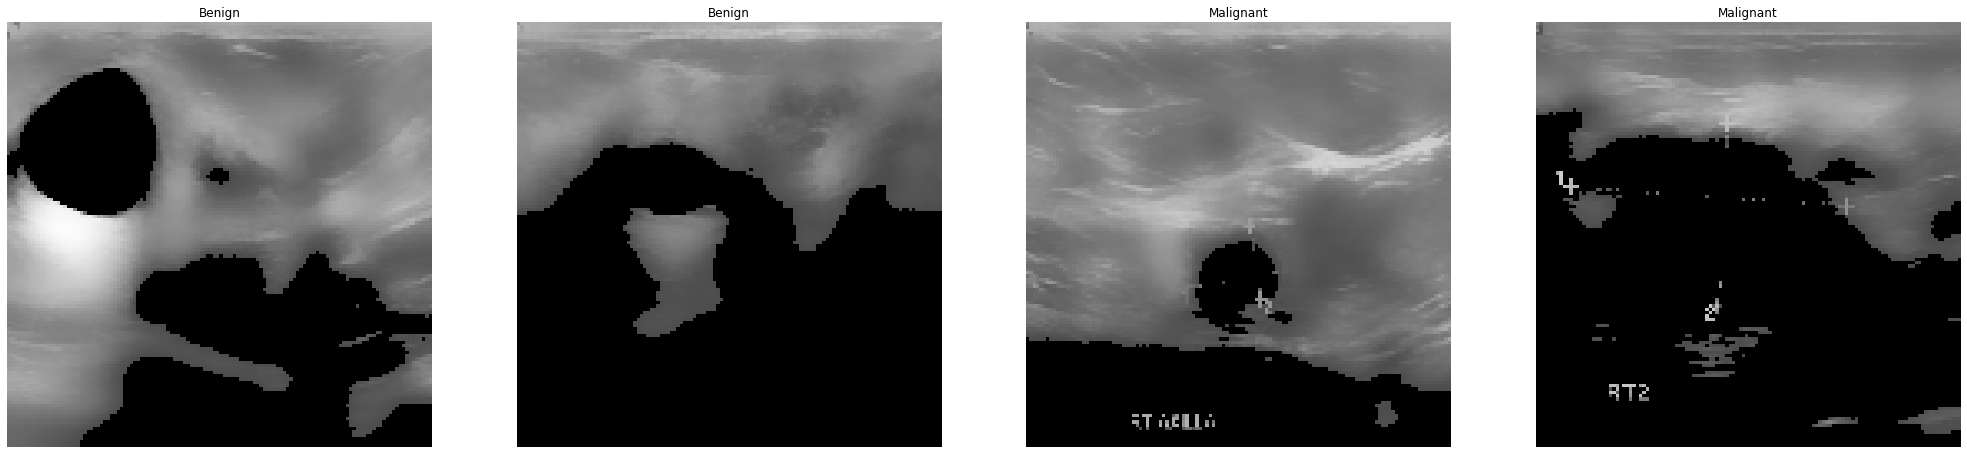

In [20]:
thresholded=[]
thresholded.clear()
for image in bilateral_images:
    thresh, binaryImg = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU)
    ret, image = cv2.threshold(image,thresh-20,255,cv2.THRESH_TOZERO)
    thresholded.append(image)
#(np.array(thresholded)).shape
sample_images(thresholded)


### Adaptive_Threshold¶

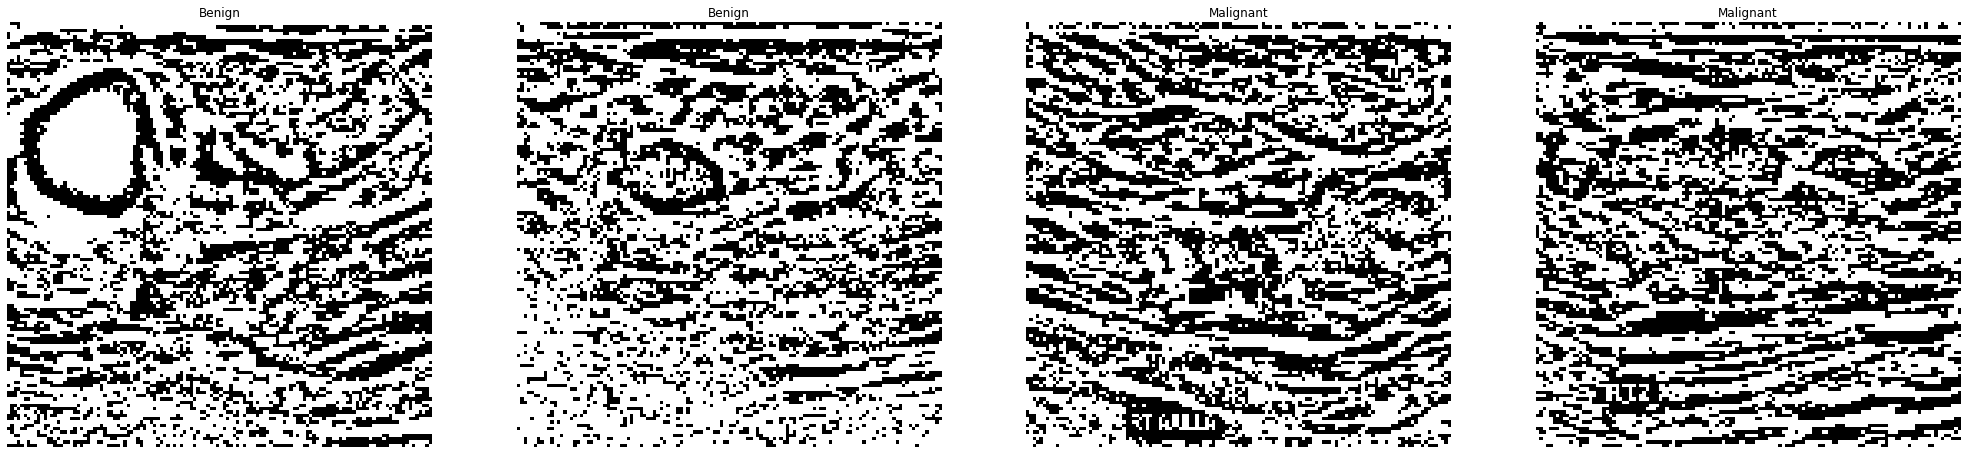

In [21]:
# Applied threshold to zero inversion
thresholded_images=[]
thresholded_images.clear()
for idx, image in enumerate(grayscale_images):
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
    thresholded_images.append(image)
sample_images(thresholded_images, True)

## Edge Detection

### Sobel Edge Detection

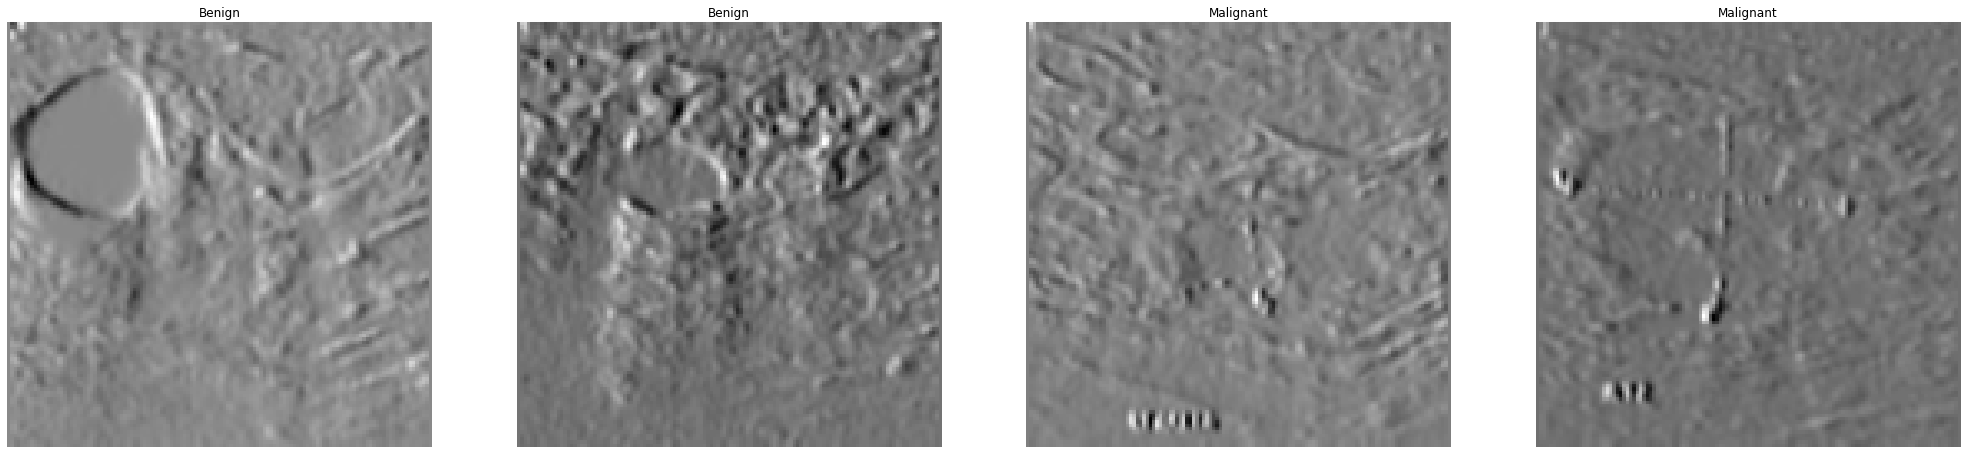

In [22]:
# Using sobel filter on grayscale images
x_edged_images=[]
x_edged_images.clear()
for idx, image in enumerate(grayscale_images):
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    x_edged_images.append(sobelx)
sample_images(x_edged_images, True)

### Conny Edge Detection

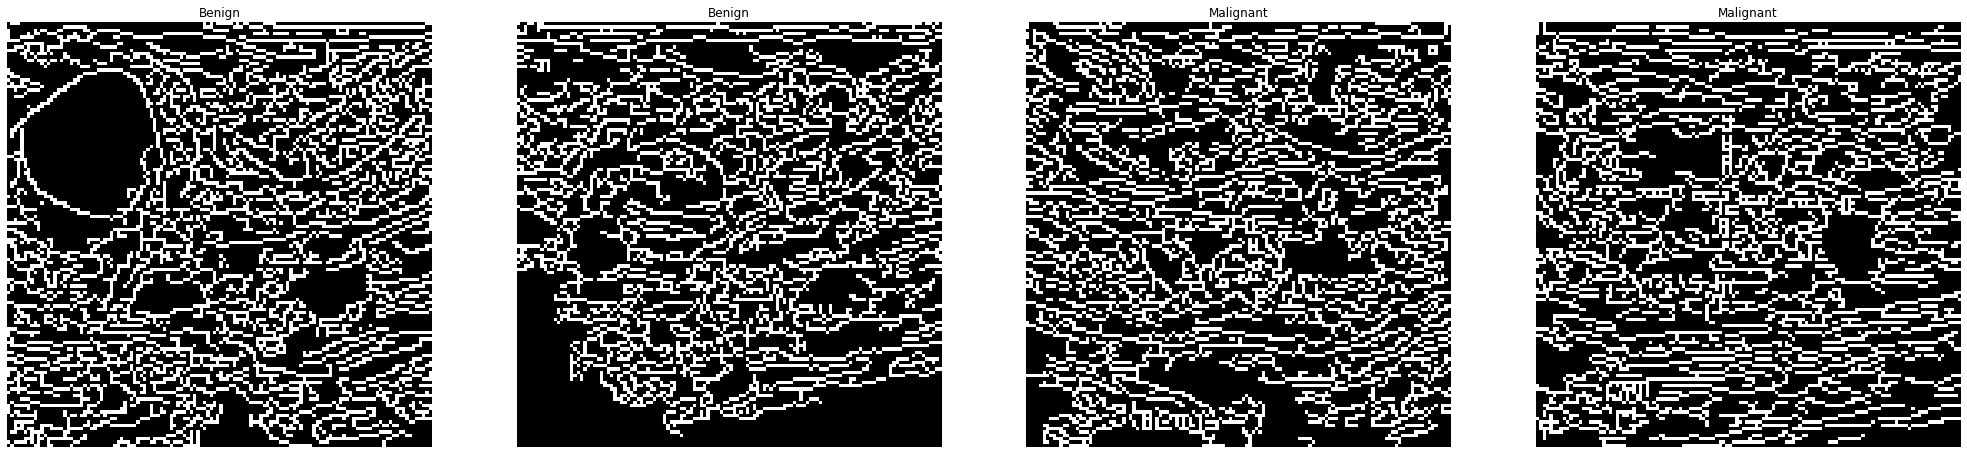

In [23]:
conny_edged_images=[]
conny_edged_images.clear()
for idx, image in enumerate(input_images):
    image = cv2.Canny(image,10,200)
    conny_edged_images.append(image)
sample_images(conny_edged_images, True)

## Morphological Operations

### Erosion

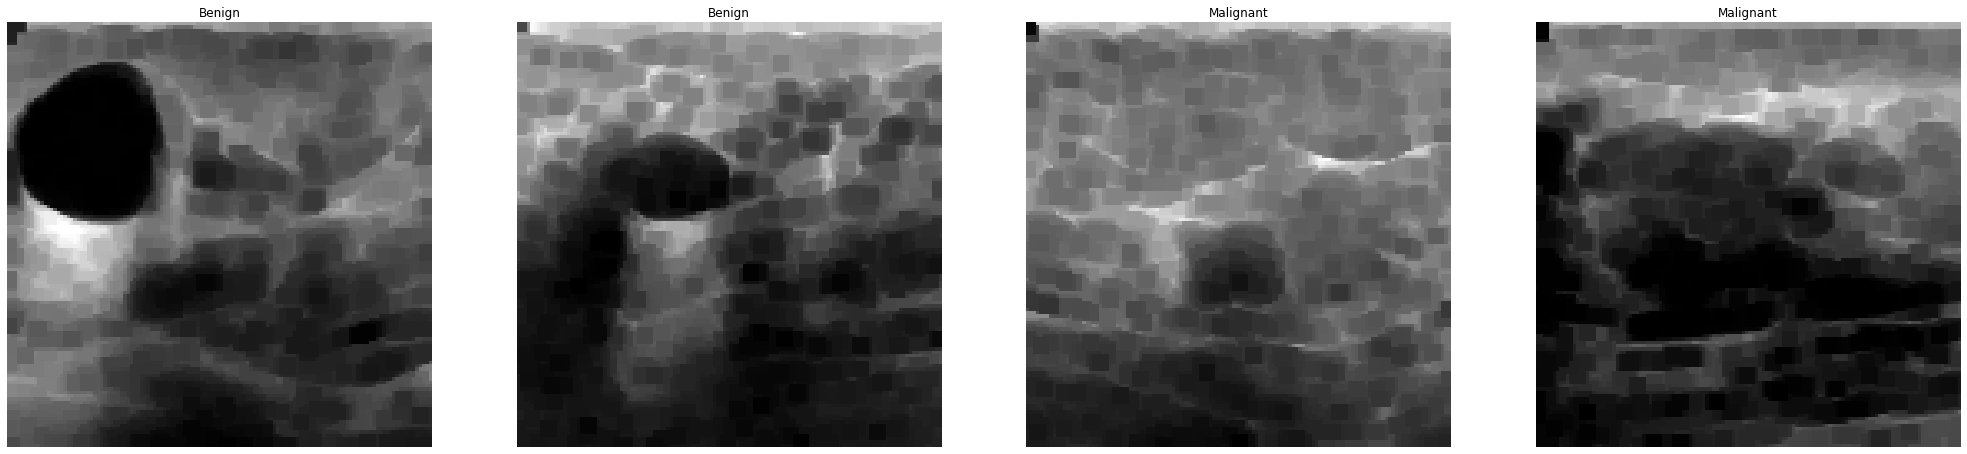

In [24]:
ero_images = []
ero_images.clear()
kernel = np.ones((5,5),np.uint8)
for idx, image in enumerate(grayscale_images):
    
    erosion = cv2.erode(image,kernel,iterations = 1)
    ero_images.append(erosion)
sample_images(ero_images, True)

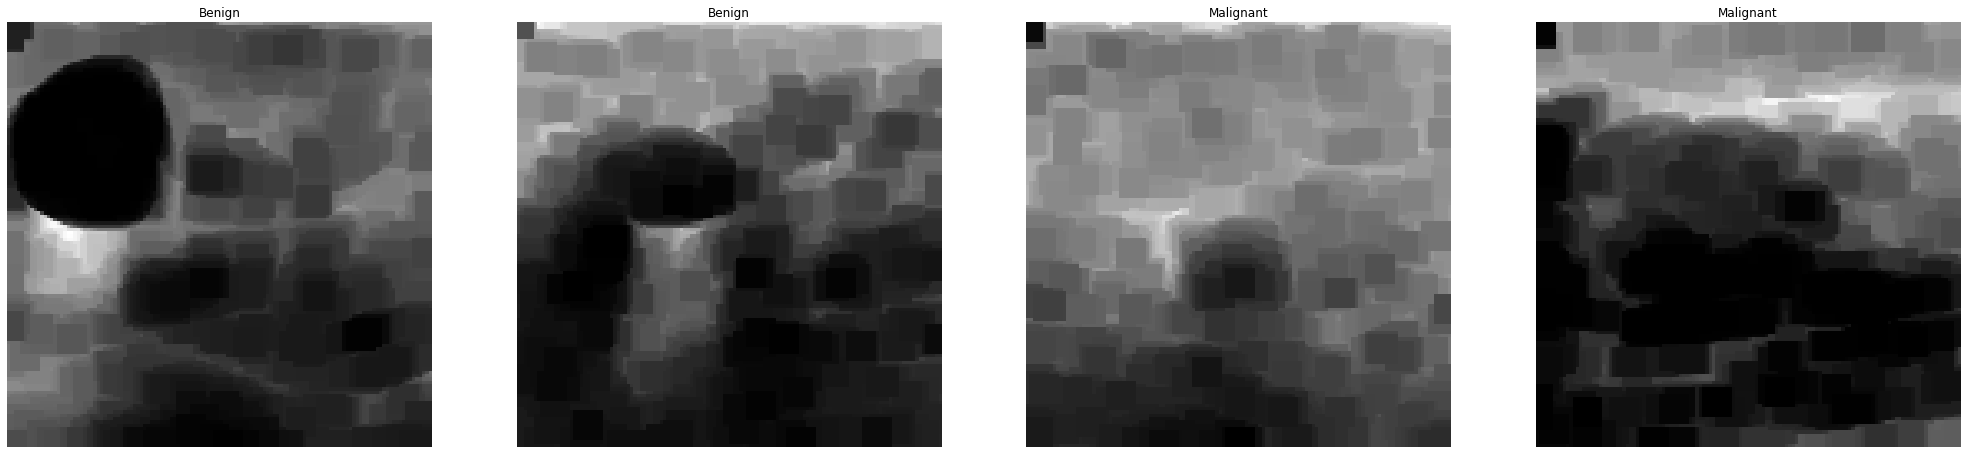

In [25]:
ero_images = []
ero_images.clear()
kernel = np.ones((3,3),np.uint8)
for idx, image in enumerate(grayscale_images):
    
    erosion = cv2.erode(image,kernel,iterations = 2)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 2)
    ero_images.append(erosion)
sample_images(ero_images, True)

## Dilation

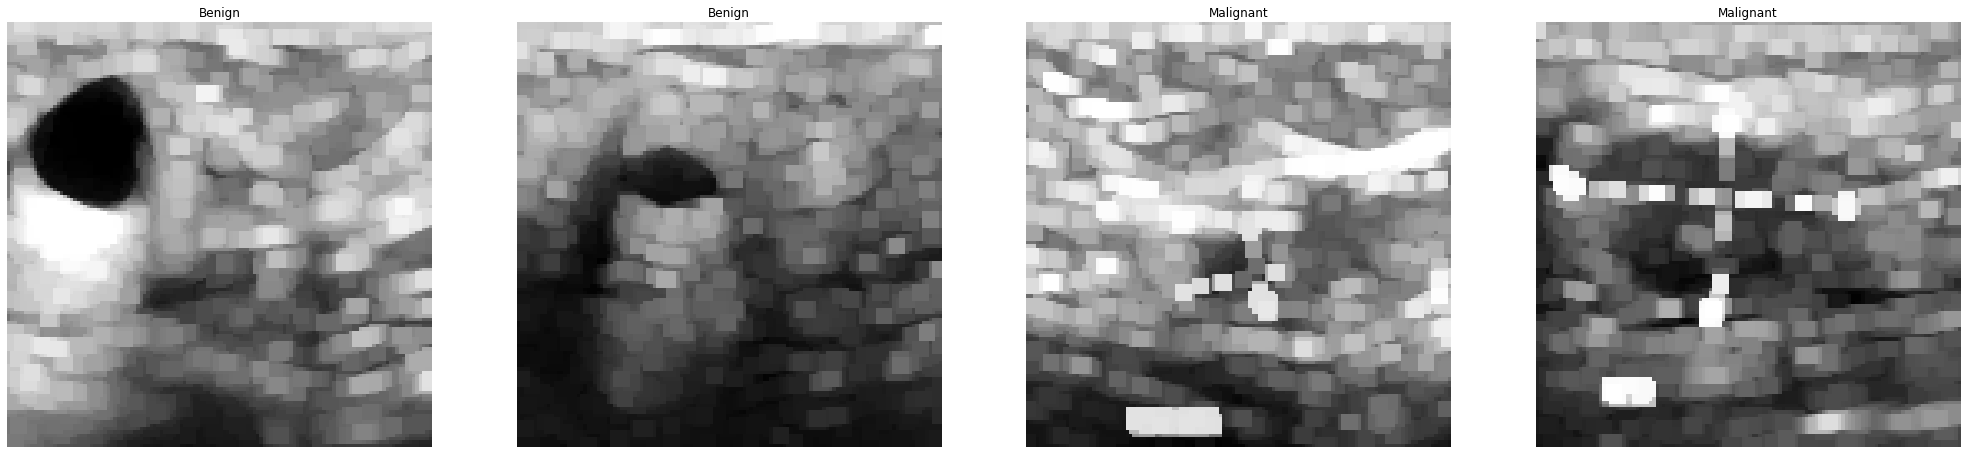

In [26]:
dilation_images = []
dilation_images.clear()
kernel = np.ones((5,5),np.uint8)
for idx, image in enumerate(grayscale_images):
    dilation = cv2.dilate(image,kernel,iterations = 1)
    dilation_images.append(dilation)
sample_images(dilation_images, True)

## Calculation Statistical and GLCM Features

In [27]:
# calculating the GLCM features
Energy = [];Correlation = [];Dissimilarity = [];Homogenity = [];Contrast = [];Entropy = []

from skimage.feature import graycomatrix, graycoprops
def energy(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])       
            return graycoprops(GLCM, 'energy')[0]
def correlation(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])      
            return graycoprops(GLCM, 'correlation')[0]
def dissimilarity(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])       
            return  graycoprops(GLCM, 'dissimilarity')[0]
def homogenity(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])       
            return  graycoprops(GLCM, 'homogeneity')[0]
def contrast(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])   
            return graycoprops(GLCM, 'contrast')[0]
def entropy(img):
            img = np.array(img)
            GLCM = graycomatrix(img, [1], [0])   
            return graycoprops(GLCM, 'entropy')[0]        
for img in input_images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    Energy.append(energy(img)[0])
    Correlation.append(correlation(img)[0])
    Dissimilarity.append(dissimilarity(img)[0])
    Homogenity.append(homogenity(img)[0])
    Contrast.append(contrast(img)[0])
    Entropy.append(contrast(img)[0]) 

In [28]:
## mean and standard deviation of grayscale images
gray_mean=[]
gray_std_dev=[]
gray_mean.clear()
gray_std_dev.clear()
for idx, image in enumerate(grayscale_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    gray_mean.append(mean)
    gray_std_dev.append(std_dev)

In [29]:
## calculating mean and standard deviation of histogram equalization images
Histeq_mean=[]
Histeq_std=[]
Histeq_mean.clear()
Histeq_std.clear()
for image in eqhist_images:
    Histeq_mean.append(np.mean(image))
    Histeq_std.append(np.std(image))

In [30]:
## mean and standard deviation of clahe images
clahe_mean=[]
clahe_std_dev=[]
clahe_mean.clear()
clahe_std_dev.clear()
for idx, image in enumerate(Clahe_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    clahe_mean.append(mean)
    clahe_std_dev.append(std_dev)

In [31]:
## mean and standard deviation of adative histogram equalization images
adaptive_mean=[]
adaptive_std_dev=[]
adaptive_mean.clear()
adaptive_std_dev.clear()
for idx, image in enumerate(thresholded):
    mean = np.mean(image)
    std_dev = np.std(image)
    adaptive_mean.append(mean)
    adaptive_std_dev.append(std_dev)

In [32]:
## mean and standard deviation of clahe images
sobel_mean=[]
sobel_std_dev=[]
sobel_mean.clear()
sobel_std_dev.clear()
for idx, image in enumerate(x_edged_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    sobel_mean.append(mean)
    sobel_std_dev.append(std_dev)

In [33]:
## calculating mean and standard deviation of erosed images 
er_mean=[]
er_std_dev=[]
er_mean.clear()
er_std_dev.clear()
for idx, image in enumerate(ero_images):
    mean = np.mean(image)
    std_dev = np.std(image)
    er_mean.append(mean)
    er_std_dev.append(std_dev)

In [34]:
# calculating the mean and standard deviation of dilated images
dl_mean=[]
dl_mean.clear()
dl_std_dev=[]
dl_std_dev.clear()
for idx, image in enumerate(dilation_images):
    mean = np.mean(image)
    std_dev = np.std(image) 
    dl_mean.append(mean)
    dl_std_dev.append(std_dev)

In [35]:
a = pd.DataFrame({'gray_mean':gray_mean})
b = pd.DataFrame({'gray_std_dev':gray_std_dev})
c = pd.DataFrame({'adaptive_mean':adaptive_mean})
d = pd.DataFrame({'adaptive_std_dev':adaptive_std_dev})
e = pd.DataFrame({'clahe_mean':clahe_mean})
f = pd.DataFrame({'clahe_std_dev':clahe_std_dev})
g = pd.DataFrame({'sobel_std_dev':sobel_std_dev})
h = pd.DataFrame({'sobel_mean':sobel_mean})
i = pd.DataFrame({'er_mean':er_mean})
j = pd.DataFrame({'er_std_dev':er_std_dev})
k = pd.DataFrame({'Histeq_mean':Histeq_mean})
l = pd.DataFrame({'Histeq_std':Histeq_std})
m = pd.DataFrame({'dl_mean':dl_mean})
n = pd.DataFrame({'dl_std_dev':dl_std_dev})
o = pd.DataFrame({'Entropy':Entropy})
p = pd.DataFrame({'Energy':Energy})
q = pd.DataFrame({'Correlation':Correlation})
r = pd.DataFrame({' Dissimilarity': Dissimilarity})
s = pd.DataFrame({'Homogenity':Homogenity})
t = pd.DataFrame({'Contrast':Contrast})
z = pd.DataFrame({'label':output})

In [36]:
# Make a list of all features aand concenate it.
pdList = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,z]  
data = pd.concat(pdList,axis=1)

In [37]:
## printing the top 5 rows
data.head()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
0,131.831543,58.489124,121.713257,68.420377,121.710510,62.081070,699.631668,-10.668152,90.185242,41.484515,128.179871,73.637883,170.387573,66.907190,0
1,103.115479,58.178947,88.194336,67.741172,119.896118,68.563775,902.196642,-15.636841,59.218201,42.266099,127.927246,73.511236,139.581238,62.944211,0
2,89.339111,67.947391,68.938049,80.159817,110.415588,59.230400,440.692354,26.064270,58.996704,53.967776,128.457275,72.978106,115.486328,75.792697,0
3,103.029175,56.943825,90.197449,66.794373,119.878357,62.012814,686.080745,14.801392,64.806885,41.265105,128.155884,73.607984,137.992615,64.899056,0
4,67.179443,46.795611,38.317322,55.458049,110.589355,61.446318,677.245957,35.041443,31.625305,26.715831,126.623413,74.436976,102.768127,56.280452,0


In [38]:
# check the features,Non-null count and Dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gray_mean         647 non-null    float64
 1   gray_std_dev      647 non-null    float64
 2   adaptive_mean     647 non-null    float64
 3   adaptive_std_dev  647 non-null    float64
 4   clahe_mean        647 non-null    float64
 5   clahe_std_dev     647 non-null    float64
 6   sobel_std_dev     647 non-null    float64
 7   sobel_mean        647 non-null    float64
 8   er_mean           647 non-null    float64
 9   er_std_dev        647 non-null    float64
 10  Histeq_mean       647 non-null    float64
 11  Histeq_std        647 non-null    float64
 12  dl_mean           647 non-null    float64
 13  dl_std_dev        647 non-null    float64
 14  label             647 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 75.9 KB


In [39]:
## finding the features mean, std,min and max
data.describe()

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,85.083744,53.296231,67.046621,62.224113,111.913174,62.474389,671.775695,4.210930,49.907745,35.956076,128.487764,72.942195,118.473160,63.214528,0.324575
std,19.347408,8.315717,23.016881,9.170190,10.551806,3.461401,115.122862,28.874529,15.885336,8.855516,1.938255,2.261114,22.733462,9.300889,0.468578
min,35.513428,32.714985,13.014648,34.231275,66.819397,52.943908,331.502165,-114.169495,8.727844,16.298624,118.381104,46.962254,58.447327,39.435408,0.000000
25%,72.974915,47.385573,50.473541,56.442710,107.102783,60.056927,599.387970,-13.634186,38.365662,29.486540,128.097839,73.218906,104.102234,56.659845,0.000000
50%,85.138550,53.153555,66.717041,62.373752,113.661926,62.297003,667.108801,3.514221,48.747253,35.886872,128.250549,73.424828,118.830688,63.483293,0.000000
75%,98.353271,59.471588,84.150238,68.794744,119.347534,64.576757,741.606632,21.228180,60.877686,42.072174,128.419861,73.555829,133.779022,69.707905,1.000000
max,136.471130,75.082079,131.875305,87.062413,128.561768,73.200720,1040.223483,96.741272,91.972656,60.875059,153.461975,78.364629,174.076111,85.731138,1.000000


            Target Variable Distribution           


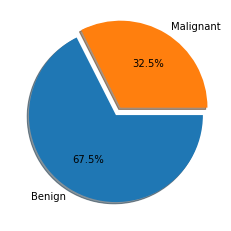

In [43]:
#Let us first analyze the distribution of the target variable
target = 'label'
labels = ['Benign','Malignant']
features = [i for i in data.columns.values if i not in [target]]
MAP={}
for e, i in enumerate(sorted(data[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
data1 = data.copy()
data1[target]=data1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(data1[target].value_counts(), labels=data1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

                                     Features Distribution                                      


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\ANKUR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


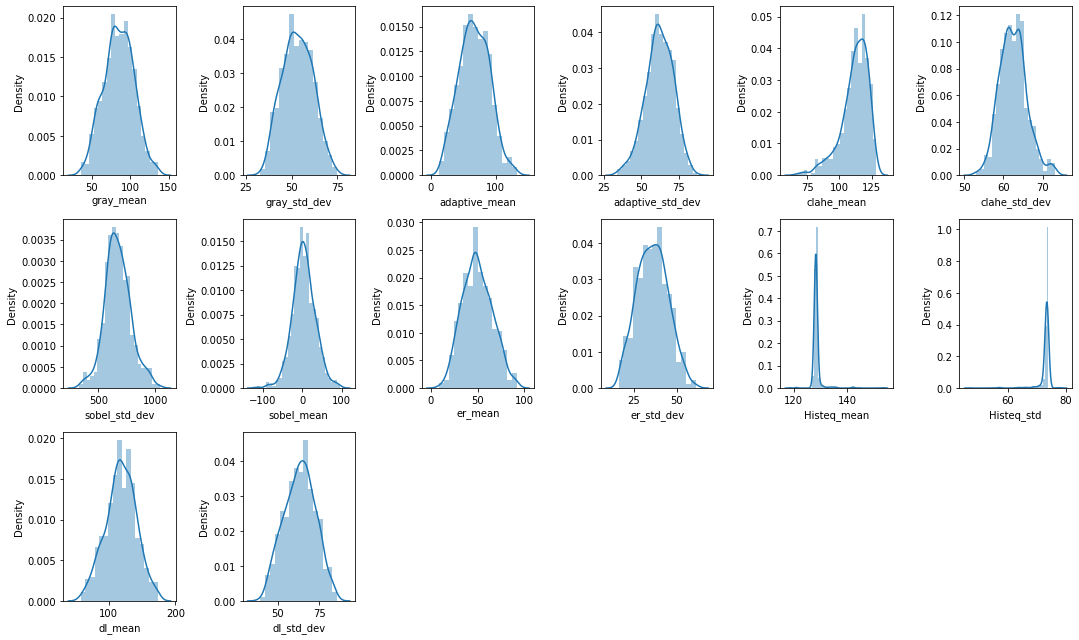

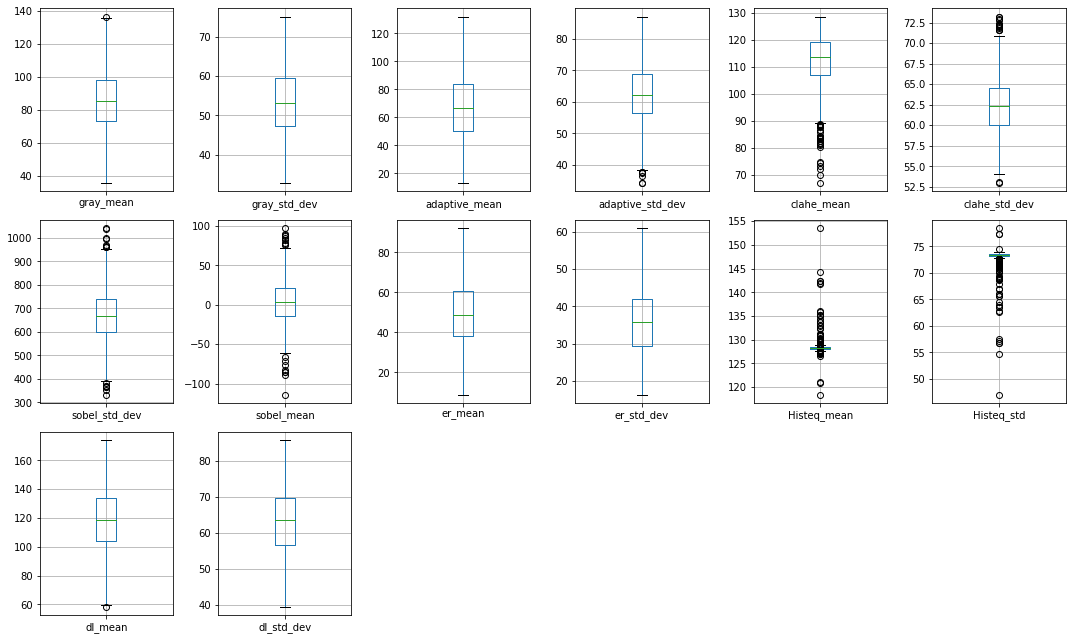

In [47]:
import math
print('\033[1mFeatures Distribution'.center(100))
cf = []
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])
n=6
nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    sns.distplot(data[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/n),n,c+1)
    data.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [48]:
#Check for empty elements
nvc = pd.DataFrame(data1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data1.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
gray_mean                         0         0.0
gray_std_dev                      0         0.0
adaptive_mean                     0         0.0
adaptive_std_dev                  0         0.0
clahe_mean                        0         0.0
clahe_std_dev                     0         0.0
sobel_std_dev                     0         0.0
sobel_mean                        0         0.0
er_mean                           0         0.0
er_std_dev                        0         0.0
Histeq_mean                       0         0.0
Histeq_std                        0         0.0
dl_mean                           0         0.0
dl_std_dev                        0         0.0
label                             0         0.0


In [49]:
# Removal of outlier:
data2 = data1.copy()

for i in [i for i in data2.columns]:
    if data2[i].nunique()>=12:
        Q1 = data2[i].quantile(0.15)
        Q3 = data2[i].quantile(0.85)
        IQR = Q3 - Q1
        data2 = data2[data2[i] <= (Q3+(1.5*IQR))]
        data2 = data2[data2[i] >= (Q1-(1.5*IQR))]
data2 = data2.reset_index(drop=True)
display(data2.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(data1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(data2.shape[0]))

,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev,label
0,131.831543,58.489124,121.713257,68.420377,121.710510,62.081070,699.631668,-10.668152,90.185242,41.484515,128.179871,73.637883,170.387573,66.907190,Benign
1,103.115479,58.178947,88.194336,67.741172,119.896118,68.563775,902.196642,-15.636841,59.218201,42.266099,127.927246,73.511236,139.581238,62.944211,Benign
2,89.339111,67.947391,68.938049,80.159817,110.415588,59.230400,440.692354,26.064270,58.996704,53.967776,128.457275,72.978106,115.486328,75.792697,Benign
3,103.029175,56.943825,90.197449,66.794373,119.878357,62.012814,686.080745,14.801392,64.806885,41.265105,128.155884,73.607984,137.992615,64.899056,Benign
4,89.999512,55.914144,77.253418,63.317187,114.635681,64.594976,716.087909,13.080322,48.491882,37.065806,127.855713,73.655765,122.895813,63.258016,Benign



Inference: Before removal of outliers, The dataset had 647 samples.
Inference: After removal of outliers, The dataset now has 579 samples.


In [50]:
#Splitting the data intro training & testing sets
data = data2.copy()
X = data.drop([target],axis=1)
Y = data[target]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',x_train.shape,y_train.shape,'\nTesting set   ---> ', x_test.shape,'', y_test.shape)

<IPython.core.display.Javascript object>

Original set  --->  (579, 14) (579,) 
Training set  --->  (463, 14) (463,) 
Testing set   --->  (116, 14)  (116,)


In [51]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
std = StandardScaler()
print('\033[1mStandardardization on Training set'.center(100))
x_train = std.fit_transform(x_train)
X_train = pd.DataFrame(x_train, columns=X.columns)
display(X_train.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
x_test = std.transform(x_test)
X_test = pd.DataFrame(x_test, columns=X.columns)
display(X_test.describe())

                               Standardardization on Training set                               


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev
count,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02,4.630000e+02
mean,3.359444e-16,4.707058e-16,1.091040e-16,1.472784e-15,7.531023e-16,4.186716e-16,5.448006e-16,6.714092e-18,8.728319e-17,2.161098e-17,1.876792e-14,-5.552167e-14,3.040524e-16,3.451912e-16
std,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00,1.001082e+00
min,-2.333836e+00,-2.415751e+00,-2.257982e+00,-2.902383e+00,-4.155759e+00,-2.989237e+00,-3.108415e+00,-3.268523e+00,-2.396485e+00,-2.169341e+00,-3.877241e+00,-3.720955e+00,-2.654151e+00,-2.487076e+00
25%,-6.893613e-01,-7.283736e-01,-7.211248e-01,-6.488307e-01,-5.558141e-01,-7.327384e-01,-6.462914e-01,-6.020553e-01,-7.361640e-01,-7.360018e-01,-3.201795e-01,-4.391820e-01,-6.207270e-01,-7.315348e-01
50%,1.173452e-02,-3.440918e-02,-2.596314e-02,-9.696184e-03,9.475243e-02,-1.111327e-02,-4.529038e-02,-2.900386e-02,-9.914181e-02,1.127125e-02,1.100944e-01,1.380725e-01,-2.878900e-02,2.017110e-02
75%,6.776103e-01,7.707866e-01,7.352723e-01,7.250060e-01,7.072687e-01,7.194165e-01,5.980926e-01,5.884630e-01,6.933799e-01,6.419692e-01,5.385019e-01,6.772766e-01,6.734422e-01,7.090354e-01
max,2.713543e+00,2.595103e+00,2.646758e+00,2.410394e+00,1.842656e+00,2.581190e+00,3.296980e+00,3.241477e+00,2.655798e+00,2.697808e+00,2.767882e+00,2.218601e+00,2.501533e+00,2.514283e+00



                                Standardardization on Testing set                                


,gray_mean,gray_std_dev,adaptive_mean,adaptive_std_dev,clahe_mean,clahe_std_dev,sobel_std_dev,sobel_mean,er_mean,er_std_dev,Histeq_mean,Histeq_std,dl_mean,dl_std_dev
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.087183,0.169404,0.113310,0.154337,-0.003023,0.109238,0.050106,0.124977,0.100620,0.168760,-0.136260,0.014726,0.038692,0.137313
std,0.947179,0.980823,0.927712,0.999476,0.991114,0.916332,1.049759,1.009137,0.960233,0.918957,0.943334,1.067450,0.936249,1.016438
min,-1.848924,-2.147467,-2.121254,-3.150953,-2.194565,-2.630809,-2.761856,-2.233582,-1.965003,-1.918348,-3.041515,-3.958702,-1.643079,-2.050494
25%,-0.587893,-0.476597,-0.503389,-0.429127,-0.782754,-0.463712,-0.672802,-0.627566,-0.577093,-0.417546,-0.584073,-0.475087,-0.659723,-0.533066
50%,-0.073772,0.238975,0.037916,0.298762,0.054873,0.152116,-0.119932,0.000489,0.013698,0.235599,0.019859,0.256008,-0.001107,0.286055
75%,0.774738,0.868100,0.733621,0.797072,0.805685,0.805391,0.728611,0.889700,0.748023,0.792932,0.438935,0.691638,0.618584,0.794310
max,2.575798,2.653690,2.781003,2.737236,1.819600,2.249009,2.936454,2.577028,2.525335,2.783949,1.945034,2.395875,2.478879,2.203652


Test Accuracy Score of Basic Logistics Regression: 78.45
              precision    recall  f1-score   support

      Benign       0.80      0.91      0.85        78
   Malignant       0.74      0.53      0.62        38

    accuracy                           0.78       116
   macro avg       0.77      0.72      0.73       116
weighted avg       0.78      0.78      0.77       116



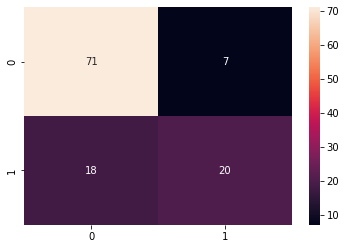

In [56]:
## Applying Logistic Regression Algorithm 
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0)
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
test_accuracy1 = round(accuracy_score(y_test, y_pred1) * 100, 2)
print('Test Accuracy Score of Basic Logistics Regression:',test_accuracy1)
conf1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf1, annot=True)
print(classification_report(y_test,y_pred1))

<IPython.core.display.Javascript object>

Test Accuracy Random Forest is : 75.0 %
              precision    recall  f1-score   support

      Benign       0.76      0.92      0.83        78
   Malignant       0.71      0.39      0.51        38

    accuracy                           0.75       116
   macro avg       0.74      0.66      0.67       116
weighted avg       0.74      0.75      0.73       116



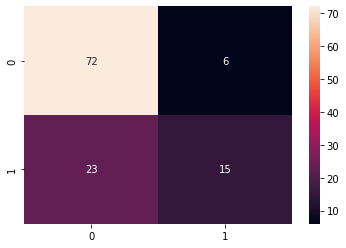

In [57]:
## Applying Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =100)
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)
print("Test Accuracy Random Forest is :",metrics.accuracy_score(y_pred2,y_test)*100,'%')
conf2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf2, annot=True)
print(classification_report(y_test,y_pred2))

Test Accuracy Score of KNN: 73.28
              precision    recall  f1-score   support

      Benign       0.74      0.94      0.82        78
   Malignant       0.71      0.32      0.44        38

    accuracy                           0.73       116
   macro avg       0.72      0.63      0.63       116
weighted avg       0.73      0.73      0.70       116



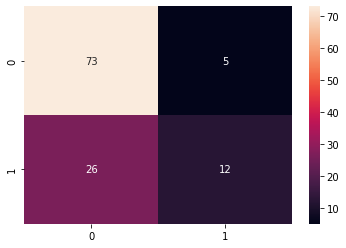

In [59]:
## Applying KNN Algorithm 
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=9 , metric= 'minkowski' , p = 4)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
test_accuracy3 = round(accuracy_score(y_test, y_pred3) * 100, 2)
print('Test Accuracy Score of KNN:',test_accuracy3)
conf3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf3, annot=True)
print(classification_report(y_test,y_pred3))

Test Accuracy Score of SVM : 78.45
              precision    recall  f1-score   support

      Benign       0.77      0.96      0.86        78
   Malignant       0.84      0.42      0.56        38

    accuracy                           0.78       116
   macro avg       0.81      0.69      0.71       116
weighted avg       0.80      0.78      0.76       116



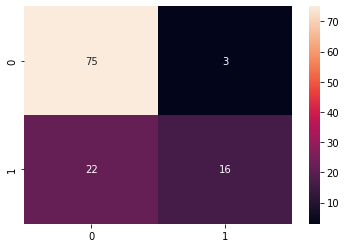

In [60]:
from sklearn.svm import SVC, LinearSVC
model4 = SVC()
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
test_accuracy4 = round(accuracy_score(y_test, y_pred4) * 100, 2)
print('Test Accuracy Score of SVM :',test_accuracy4)
conf4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(conf4, annot=True)
print(classification_report(y_test,y_pred4))

Test Accuracy Score of Decision Tree is : 70.69
              precision    recall  f1-score   support

      Benign       0.78      0.78      0.78        78
   Malignant       0.55      0.55      0.55        38

    accuracy                           0.71       116
   macro avg       0.67      0.67      0.67       116
weighted avg       0.71      0.71      0.71       116



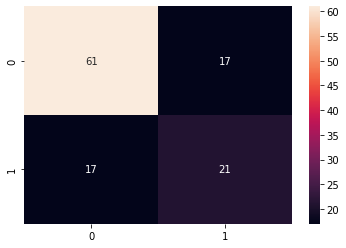

In [61]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier()
model5.fit(x_train,y_train)
y_pred5 = model5.predict(x_test)
test_accuracy5 = round(accuracy_score(y_test, y_pred5) * 100, 2)
print('Test Accuracy Score of Decision Tree is :',test_accuracy5)
conf5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(conf5, annot=True)
print(classification_report(y_test,y_pred5))

Test Accuracy Score of Naive Bayes: 66.38
              precision    recall  f1-score   support

      Benign       0.75      0.74      0.75        78
   Malignant       0.49      0.50      0.49        38

    accuracy                           0.66       116
   macro avg       0.62      0.62      0.62       116
weighted avg       0.67      0.66      0.66       116



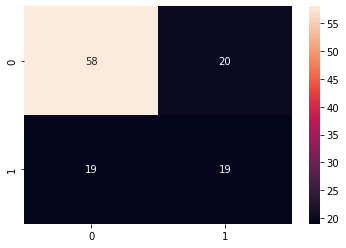

In [63]:
## Applying Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(x_train,y_train)
y_pred6 = model6.predict(x_test)
test_accuracy6 = round(accuracy_score(y_test, y_pred6) * 100, 2)
print('Test Accuracy Score of Naive Bayes:',test_accuracy6)
conf6 = confusion_matrix(y_test, y_pred6)
sns.heatmap(conf6, annot=True)
print(classification_report(y_test,y_pred6))

In [55]:
##============================================THE END=========================================##